# 住宅情報の分析

【問題1】データセットの取得

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題2】データセット自体の調査

概要<br>
sales priocesを予測し、特徴エンジニアリングのスキルを磨き、ランダムフォレストや勾配ブースティングについて学ぶ。<br>
2010年にエイムズ市はCNNの調査で住みたい街ランキングで9位にランクインしたことがある。<br>


train.csv - トレーニングデータセット<br>
test.csv - テストデータセット <br>
data_description.txt - 各カラムの説明、元々はディーン・デ・コックが作成したものですが、ここで使用されているカラム名に合わせて軽く編集されています。<br>
sample_submission.csv - 販売年と月、面積、ベッドルーム数の線形回帰からの提出サンプル<br>

データフィールド<br>
SalePrice - 目的変数。今回はこれを予測する。<br>
MSSubClass: 建物の階級？<br>
MSZoning: 一般的なゾーニングの分類<br>
LotFrontage: 敷地に接続された道路の直線フィート<br>
LotArea: 平方フィートのロットサイズ<br>
Street: 道路アクセスの種類<br>
Alley: 路地アクセスの種類<br>
LotShape: 物件の一般的な形状<br>
LandContour: 物件の平坦度<br>
Utilities: 利用可能なユーティリティの種類<br>
LotConfig: ロット構成<br>
LandSlope: 物件の勾配(傾き？)<br>
Neighborhood: エイムズ市内の物理的な場所<br>
Condition1: 幹線道路や鉄道への近接性<br>
Condition2: 幹線道路や鉄道に近い（セカンドがある場合<br>
BldgType: 住まいの種類<br>
HouseStyle: 住まいのスタイル<br>
OverallQual: 全体的な素材と仕上げの品質<br>
OverallCond: 総合的なコンディション評価<br>
YearBuilt: 当初の施工日<br>
YearRemodAdd: リフォーム日<br>
RoofStyle: 屋根の種類<br>
RoofMatl: 屋根材<br>
Exterior1st: 家の外壁塗装<br>
Exterior2nd: 家の外壁塗装（複数の材料がある場合<br>
MasVnrType: メイソンリーベニヤタイプ(???)<br>
MasVnrArea: 石積みベニヤ面積（平方フィート<br>
ExterQual: 外装材の品質<br>
ExterCond: 外装材の現在の状態<br>
Foundation: 礎の種類<br>
BsmtQual: 地下室の品質<br>
BsmtCond: 地下室の一般的な状態<br>
BsmtExposure: ウォークアウトやガーデンレベルの地下室の壁<br>
BsmtFinType1: 地下室の完成品の品質<br>
BsmtFinSF1: タイプ1の完成スクエアフィート<br>
BsmtFinType2: 第二仕上げエリアの品質（存在する場合<br>
BsmtFinSF2: タイプ2完成スクエアフィート<br>
BsmtUnfSF: 地下室面積の未完成平方フィート<br>
TotalBsmtSF: 地下室の面積の合計平方フィート<br>
Heating: 暖房の種類<br>
HeatingQC: 暖房の品質と条件<br>
CentralAir: セントラル空調<br>
Electrical: 電気システム<br>
1stFlrSF: 1階角部屋<br>
2ndFlrSF: 2階の平方フィート<br>
LowQualFinSF: 低品質の完成平方フィート（全フロア<br>
GrLivArea: 地上（地上）の居住面積平方フィートの上<br>
BsmtFullBath: 地下室フルバスルーム<br>
BsmtHalfBath: 地下室のハーフバスルーム<br>
FullBath: グレード以上のフルバスルーム<br>
HalfBath: グレード以上のハーフバス<br>
Bedroom: 地下1階以上のベッドルーム数<br>
Kitchen: キッチンの数<br>
KitchenQual: キッチンの品質<br>
TotRmsAbvGrd: グレード以上の部屋数（バスルームは含まない<br>
Functional: ホームの機能性評価<br>
Fireplaces: 暖炉の数<br>
FireplaceQu: 暖炉の品質<br>
GarageType: 車庫の位置<br>
GarageYrBlt: ガレージが建てられた年<br>
GarageFinish: ガレージの内装仕上げ<br>
GarageCars: 車の収容可能な車庫の大きさ<br>
GarageArea: 平方フィートのガレージのサイズ<br>
GarageQual: ガレージの品質<br>
GarageCond: 車庫の状態<br>
PavedDrive: 舗装されたドライブウェイ<br>
WoodDeckSF: ウッドデッキ面積（平方フィート<br>
OpenPorchSF: オープンポーチ面積（平方フィート<br>
EnclosedPorch: 平方フィートで囲まれたポーチの面積<br>
3SsnPorch: スリーシーズンポーチ面積（平方フィート<br>
ScreenPorch: 平方フィートのスクリーンポーチ面積<br>
PoolArea: プール面積（平方フィート<br>
PoolQC: プールの品質<br>
Fence: フェンスの品質<br>
MiscFeature: 他のカテゴリではカバーされていない雑多な機能<br>
MiscVal: 雑多な機能の価格<br>
MoSold: 販売月<br>
YrSold: 販売年<br>
SaleType: 販売の種類<br>
SaleCondition: 販売条件<br>

【問題3】データの確認

In [2]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# 今回の目的変数はどの列か確認する。
train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


【問題4】欠損値への対応

<AxesSubplot:>

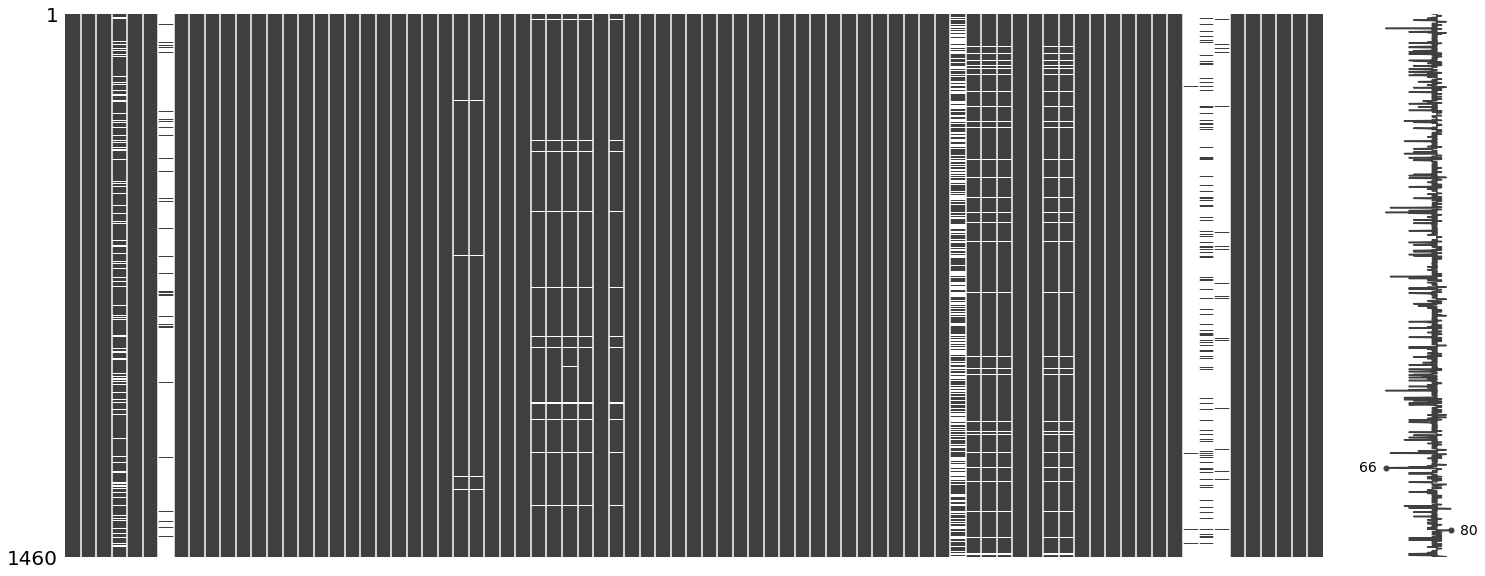

In [5]:
# 各特徴量の欠損値の有無を確認する。
import missingno as msno
%matplotlib inline
msno.matrix(train_df)

In [6]:
for i, k in enumerate(train_df.isnull().sum()):
    print(train_df.columns[i], k)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [7]:
# 欠損値が何パーセント含まれるかを確認する。
null_ratio = pd.DataFrame(train_df.isnull().count(), columns=['total'])
null_ratio['missing'] = 0
for i, k in enumerate(train_df.isnull().sum()):
    null_ratio['missing'][i] = k
null_ratio['missing_ratio'] = null_ratio['missing'] / null_ratio['total']
null_ratio.sort_values('missing_ratio', ascending=False).head(20)

,total,missing,missing_ratio
PoolQC,1460,1453,0.995205
MiscFeature,1460,1406,0.963014
Alley,1460,1369,0.937671
Fence,1460,1179,0.807534
FireplaceQu,1460,690,0.472603
LotFrontage,1460,259,0.177397
GarageYrBlt,1460,81,0.055479
GarageCond,1460,81,0.055479
GarageType,1460,81,0.055479
GarageFinish,1460,81,0.055479


説明変数の中に、15%以上の値が欠損しているものがある場合、それを存在しないものとして扱う事を考える。<br>
つまり、欠損値を埋める為の手法を適応しないという事。<br>
この場合、上位6つの特徴がそれに該当する。<br>
これらの変数が、果たして目的変数を予測する時に本当に必要ない変数なのかを吟味する。今回は考慮しなくても良さそう。<br>
Garage〜や、Bsmt〜と言った変数も、欠損値が発生しており、それらも削除してしまっても問題ないように思える。<br>
また、MasVnrAreaやMasVnrTypeと言った変数も必須ではないと考えることができ、SalePriceと強い相関を持つ変数との<br>
多重共線性が指摘できる為、これらの変数を削除しても問題ない。<br>


In [8]:
# 5つ以上欠損値がある特徴量（列）は削除する。
we_should_delete = null_ratio[null_ratio['missing'] >= 5]
we_should_delete_columns = list(we_should_delete.index)
train_df_deleted_col = train_df.drop(we_should_delete_columns, axis=1)
train_df_deleted_col

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
# 欠損値があるサンプル（行）は削除する。
train_df_deleted_row = train_df.dropna(how='any', axis=0)
train_df_deleted_row
# 全部消える・・・？

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


【問題5】用語の調査

・尖度:分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す<br>
・歪度:分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと<br>
参考サイト：https://bellcurve.jp/statistics/course/17950.html<br>

【問題6】分布の確認

歪度(Skewness) : 1.8828757597682129
尖度(Kurtosis) : 6.536281860064529


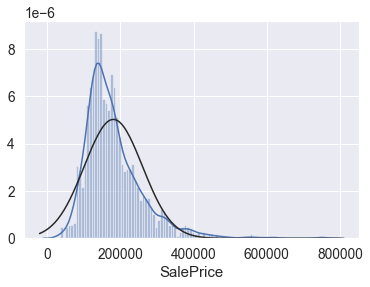

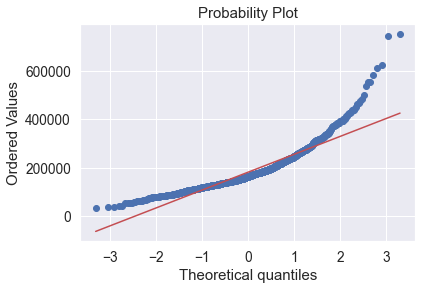

In [50]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
import seaborn as sns
sns.distplot(train_df['SalePrice'], bins=100, fit=norm)
print("歪度(Skewness) :", train_df['SalePrice'].skew())
print("尖度(Kurtosis) :", train_df['SalePrice'].kurt())
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

SalePriceの分布の形から、データが正規分布に従っていないことがわかる。<br>
しかし、歪度が正であるので、対数変換によって分布を補正することができる。

In [51]:
# 目的変数に対して対数変換を行う。
log_trans = train_df['SalePrice'].apply(np.log)
log_trans

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

歪度(Skewness) : 0.12133506220520406
尖度(Kurtosis) : 0.8095319958036296


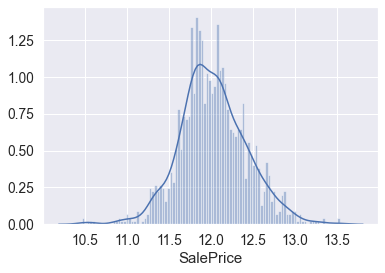

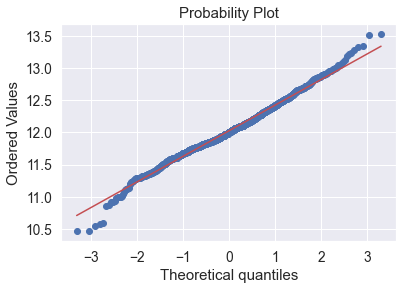

In [52]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(log_trans, bins=100)
print("歪度(Skewness) :", log_trans.skew())
print("尖度(Kurtosis) :", log_trans.kurt())
fig = plt.figure()
res = stats.probplot(log_trans, plot=plt)

【問題7】相関係数の確認

<AxesSubplot:>

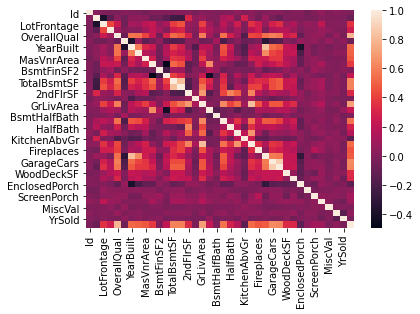

In [11]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
train_corr = train_df.corr()
sns.heatmap(train_corr)

読み込んだデータからそのまま相関係数を求めた場合、目的変数と相関を取ることができる説明変数は、int型の説明変数のみである。<br>
また、全体的に相関が高い訳ではなく、目的変数の予測に用いる変数が多ければ多いほど良いというわけではなさそう。<br>

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


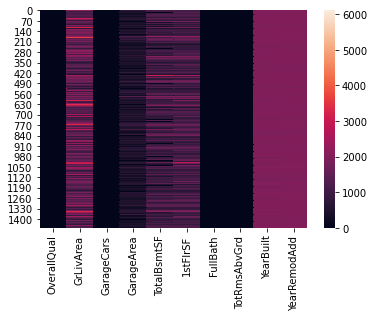

In [12]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
most_big_corr = train_corr['SalePrice']
most_big_corr_df = pd.DataFrame(most_big_corr)
most_big_corr_df_sorted = most_big_corr_df.sort_values('SalePrice', ascending=False)
most_big_corr_features = most_big_corr_df_sorted.head(11)
most_big_corr_features = most_big_corr_features.drop('SalePrice', axis=0)
use_features = list(most_big_corr_features.index)
top_ten_df = train_df[use_features]
sns.heatmap(top_ten_df)
print(use_features)

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。<br>
相関係数順位:<br>
1.OverallQual: 全体的な素材と仕上げの品質<br>
2.GrLivArea: 地上（地上）の居住面積平方フィートの上<br>
3.GarageCars: 車の収容可能な車庫の大きさ<br>
4.GarageArea: 平方フィートのガレージのサイズ<br>
5.TotalBsmtSF: 地下室の面積の合計平方フィート<br>
6.1stFlrSF: 1階角部屋<br>
7.FullBath: グレード以上のフルバスルーム<br>
8.TotRmsAbvGrd: グレード以上の部屋数（バスルームは含まない<br>
9.YearBuilt: 当初の施工日<br>
10.YearRemodAdd: リフォーム日<br>

目的変数と相関が高かった上位10個の特徴量同士で相関を見てみると、特徴量同士では相関が低いことがわかる。<br>
後々出てくるだろうが、多重共線性の問題は発生していないように感じる。<br>

In [13]:
# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
def calc_corr(df):
    # 相関係数行列を作成
    corr_mat = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = corr_mat.shape[0]

    # 項目名を取得
    columns = corr_mat.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(corr_mat.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary
    df_new["corr"] = corr_ary

    return df_new

In [14]:
df = calc_corr(top_ten_df)
df.sort_values('corr', ascending=False).head(3)

,var1,var2,corr
5,GarageArea,GarageCars,0.882475
22,TotRmsAbvGrd,GrLivArea,0.825489
14,1stFlrSF,TotalBsmtSF,0.819530


選んだ10個の特徴量の中では、上記3つの組み合わせが最も相関係数が高いものとなった。<br>
部屋の数や、住居の面積に関する項目同士での高い相関が見受けられた。直感的に、住宅の価格を高める要素として<br>
ふさわしいのではないかと感じる。しかし、GarageCarsと、GarageAreaは、一つの特徴量にまとめてしまって良いのではないかと感じる。

# kaggleノートブックを参考にしたEDA


参考サイト等
https://qiita.com/muscle_nishimi/items/901ed94f3cdf1c8d893a<br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python<br>
https://en.wikipedia.org/wiki/Ames,_Iowa<br>

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

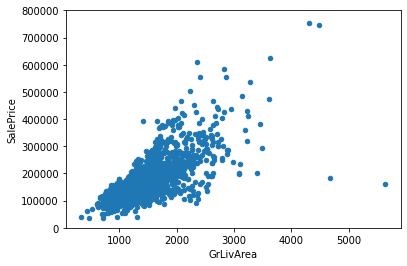

In [15]:
# 既に友達とか言ってる
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

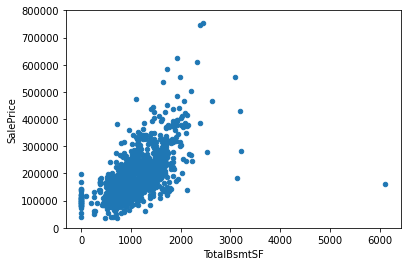

In [16]:
# より強い関係を持つ特徴に見えるとか言ってる
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

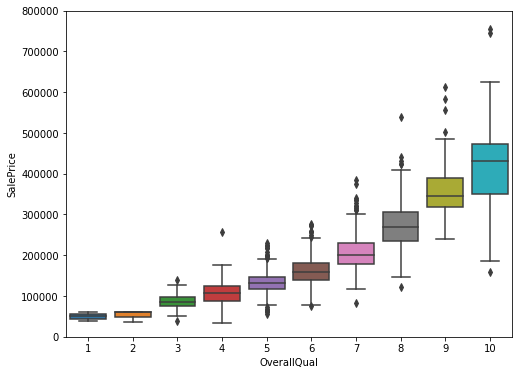

In [17]:
# SalePrice」も他の美少女同様、「OverallQual」を楽しんでいます。自分へのご褒美：マクドナルドが初デートに適しているかどうか考えてみてください。
# 要するに品質良いものの方がターゲットは喜んでくれやすいよねと言っている
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

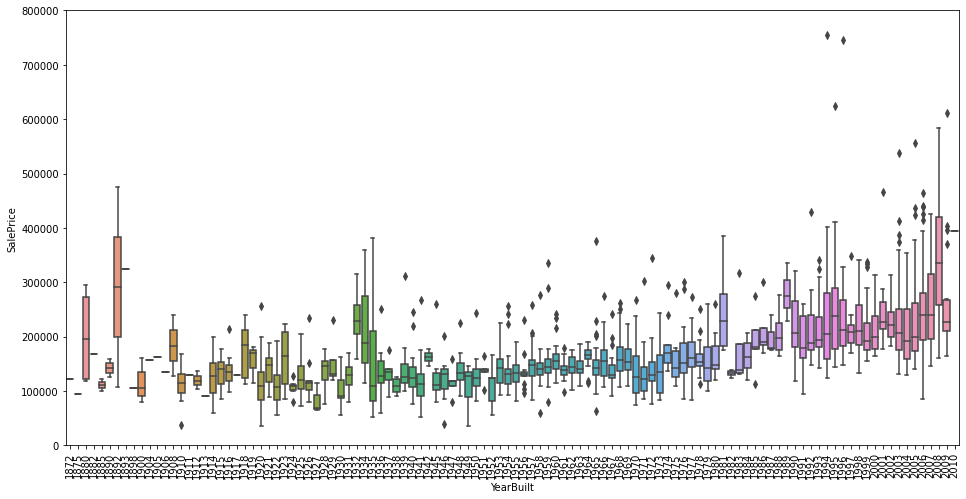

In [18]:
# 古いものより新しいものに、比較的お金が流れる傾向にある?
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

問題を推測するときに使う武器<br>
・相関係数行列(ヒートマップ)<br>
・目的変数相関行列（こちらもヒートマップ）<br>
・最も相関のある変数間の散布図<br>

【ヒートマップの目的】<br>
主に変数間の相関を見る際に使用する。その中で、目的変数以外の特徴量間で高い相関が見受けられた場合は、多重共線性の可能性が高い為、どちらかの変数を削除する。

<AxesSubplot:>

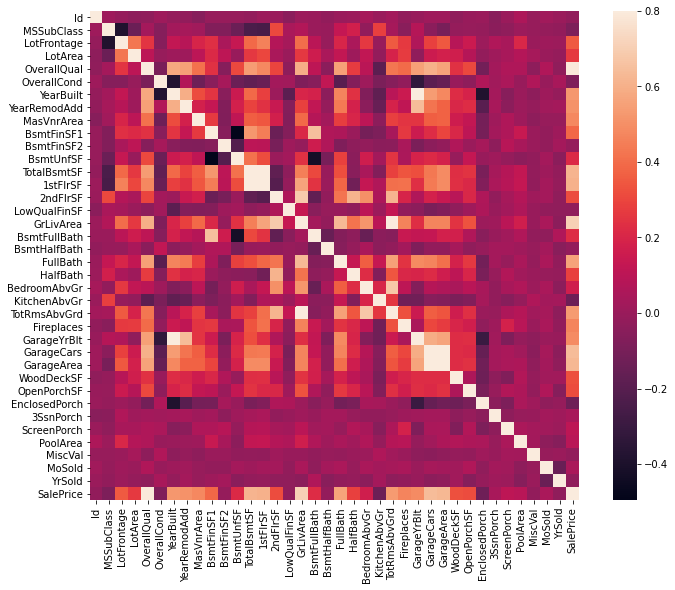

In [19]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

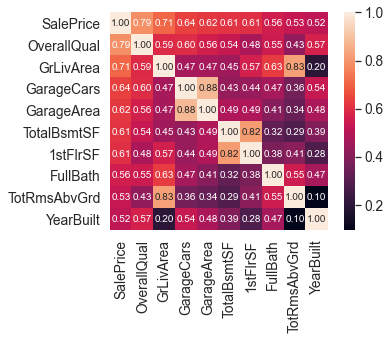

In [20]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


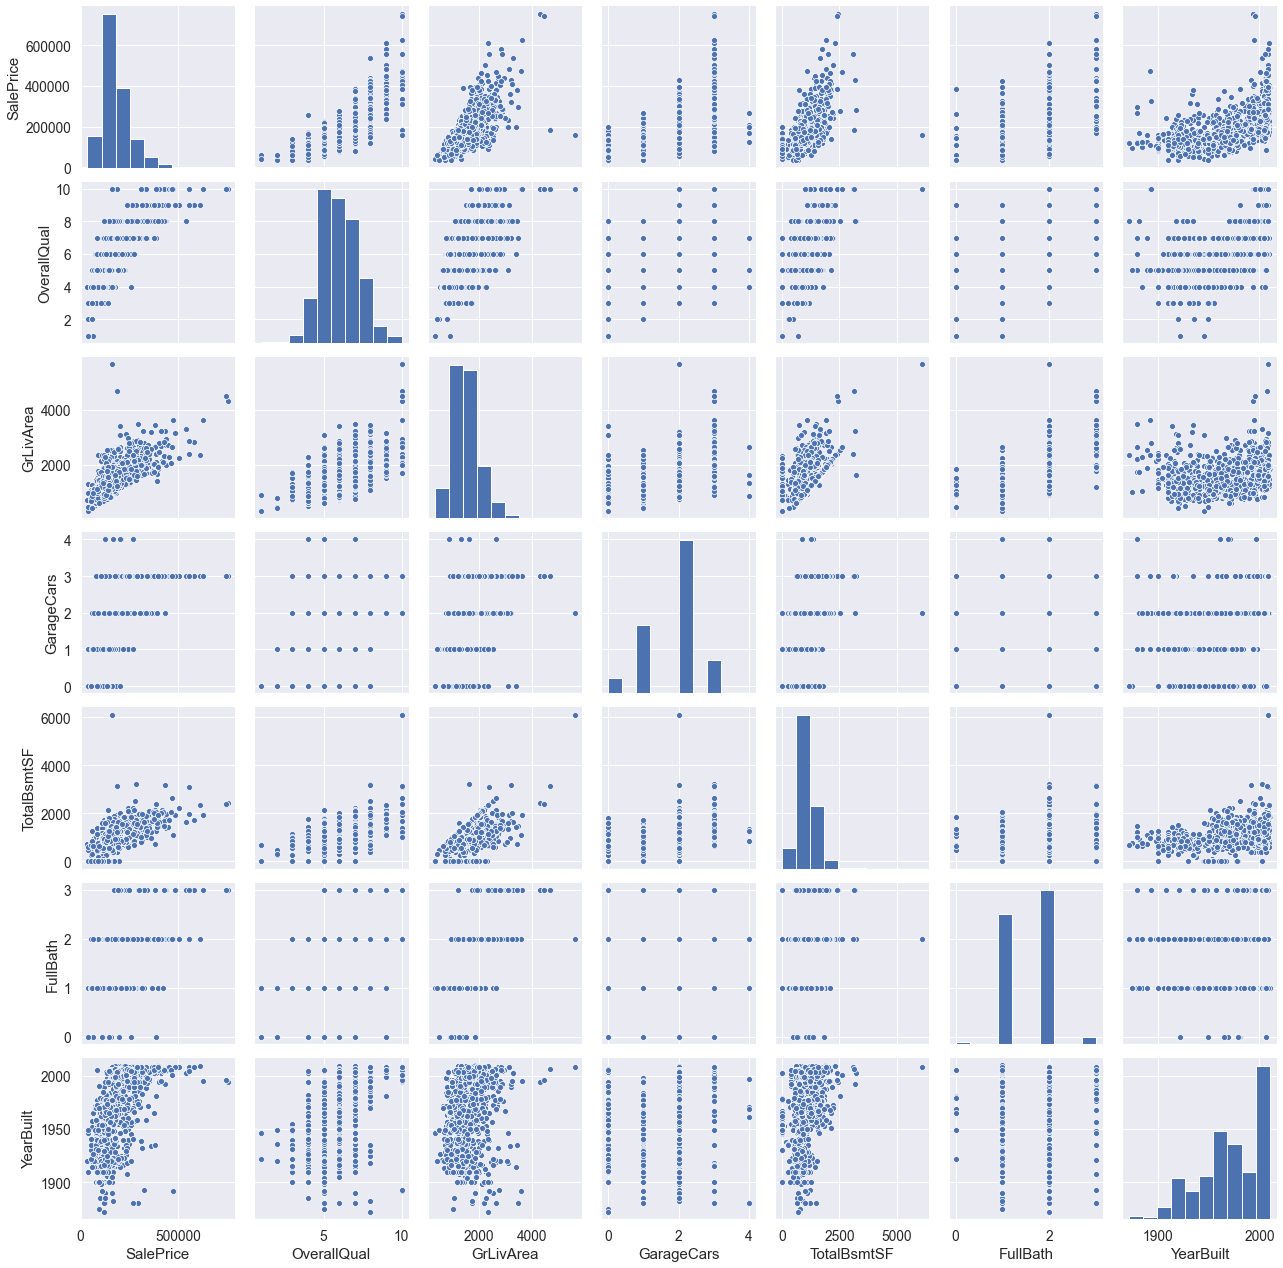

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size=2.5)

In [22]:
# 欠損値処理完了
train_df = train_df.drop((null_ratio[null_ratio['missing'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df.isnull().sum().max()

0

In [23]:
# データの標準化を行い外れ値を検出する
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<ipython-input-23-d2c3cdea0489>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis])


・小さい値は0に近い<br>
・大きい値は0から大きく離れている<br>
特に値を外すことはしないが、7の値には要注意

In [24]:
train_df.sort_values('GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [25]:
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

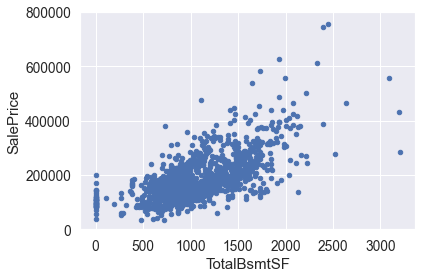

In [26]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

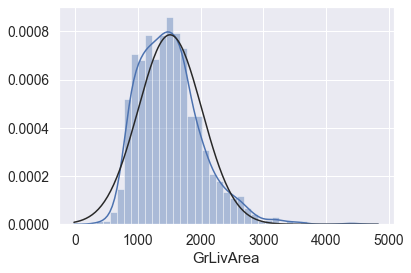

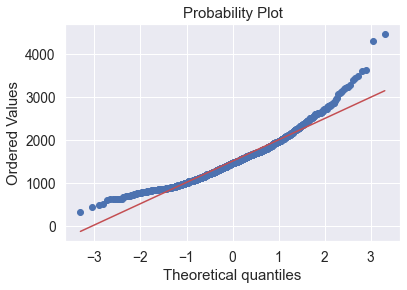

In [27]:
# GrLivAreaでもSalePriceと同様に、分布を確認してみる
sns.distplot(train_df['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

SalePriceと同じような歪みをしているので、対数変換してみる

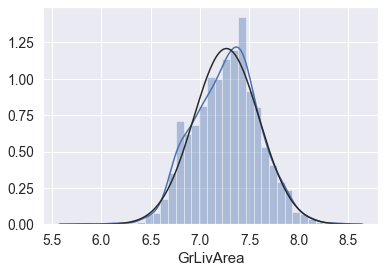

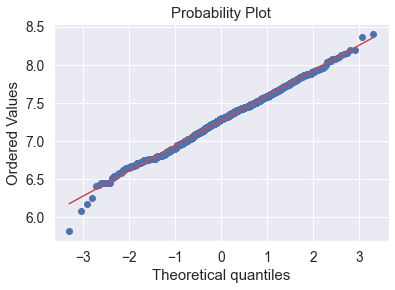

In [28]:
log_trans = train_df['GrLivArea'].apply(np.log)
sns.distplot(log_trans, fit=norm)
fig = plt.figure()
res = stats.probplot(log_trans, plot=plt)

かなり歪みを補正できたっぽい

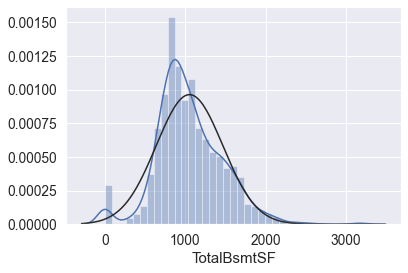

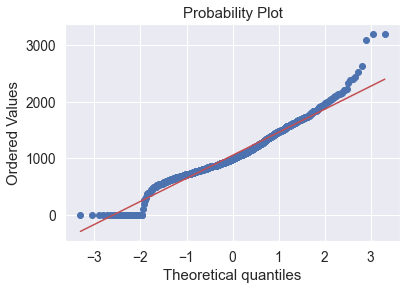

In [29]:
# TotalBsmtSFでも同様に
sns.distplot(train_df.TotalBsmtSF, fit=norm)
fig = plt.figure()
res = stats.probplot(train_df.TotalBsmtSF, plot=plt)

値が0のものがあるので、対数変換が使えない。どうするか？<br>
地下室を持つか持たないかの意味を持つバイナリ変数を作り、値0のものを無視して、0ではない全てのレコードに対数変換を行う。<br>
→数学的に正しいかは不明。テクニックの一つと考えておく。<br>
追記：なぜ目的変数、説明変数の正規性を確認して対数変換で正規性を確保するのか？→https://toukeier.hatenablog.com/entry/2019/09/08/224346<br>
目的変数、説明変数自身の分布が正規分布に従っているのではなく、その残渣が直線で近似できていれば、そこで初めて正規分布に従っていると言える<br>

In [30]:
train_df['HasBsmt'] = 0
train_df.loc[train_df.TotalBsmtSF > 0, 'HasBsmt'] = 1

In [31]:
train_df.loc[train_df.HasBsmt==1, 'TotalBsmtSF'] = np.log(train_df.TotalBsmtSF)

/Users/sasanoshouta/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


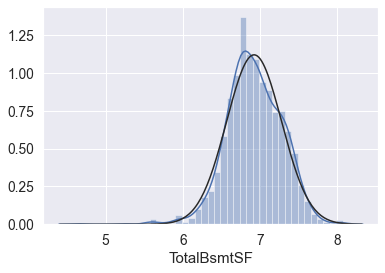

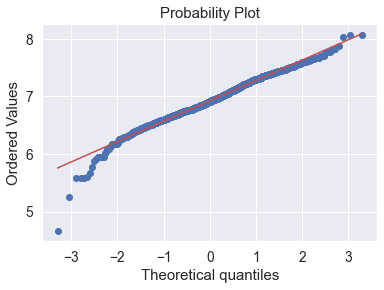

In [32]:
sns.distplot(train_df[train_df.TotalBsmtSF > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df[train_df.TotalBsmtSF > 0]['TotalBsmtSF'], plot=plt)

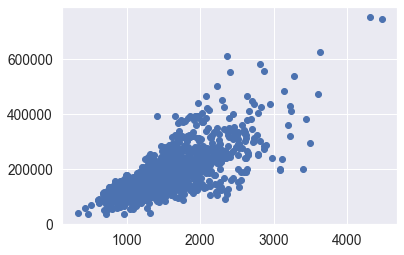

In [33]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice)

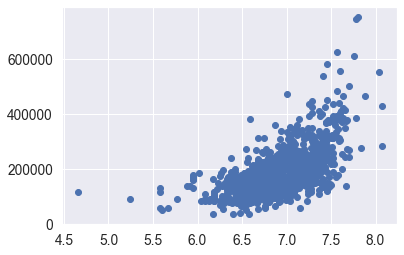

In [34]:
plt.scatter(train_df[train_df.TotalBsmtSF > 0]['TotalBsmtSF'], train_df[train_df.TotalBsmtSF > 0]['SalePrice'])

最後に、ダミー変数を作る

In [35]:
train_df = pd.get_dummies(train_df)
train_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


# EDAその2

参考ノートブック：https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

In [36]:
train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [37]:
# 数値データとobjectデータの数
numerical_feats = train_df.dtypes[train_df.dtypes != 'object'].index
print('numerical featuresの数: ', len(numerical_feats))
categorical_feats = train_df.dtypes[train_df.dtypes == 'object'].index
print('object featuresの数: ', len(categorical_feats))

numerical featuresの数:  38
object featuresの数:  43


In [38]:
# 欠損値の穴埋め→categoryデータをNaN→Noneへ
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
for col in cols_fillna:
    train_df[col].fillna('None', inplace=True)

In [39]:
train_df[categorical_feats].isnull().sum().max()

0

In [40]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000


In [41]:
# numericalデータでNaNがある残り3特徴の欠損値保管→各特徴量の平均で補間
train_df.fillna(train_df.mean(), inplace=True)

In [42]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [43]:
# 各特徴量に対して対数変換を行う
for col in numerical_feats:
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(train_df[col].skew()), 'Kurtosis: {:06.2f}'.format(train_df[col].kurt()))

Id              Skewness: 00.00 Kurtosis: -01.20
MSSubClass      Skewness: 01.41 Kurtosis: 001.58
LotFrontage     Skewness: 02.38 Kurtosis: 021.85
LotArea         Skewness: 12.21 Kurtosis: 203.24
OverallQual     Skewness: 00.22 Kurtosis: 000.10
OverallCond     Skewness: 00.69 Kurtosis: 001.11
YearBuilt       Skewness: -0.61 Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50 Kurtosis: -01.27
MasVnrArea      Skewness: 02.68 Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69 Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26 Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92 Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52 Kurtosis: 013.25
1stFlrSF        Skewness: 01.38 Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81 Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01 Kurtosis: 083.23
GrLivArea       Skewness: 01.37 Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60 Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10 Kurtosis: 016.40
FullBath        Skewness: 00.04 Kurtosis: -00.86
HalfBath        Skew

skwe:  1.3665603560164552
kurt:  4.895120580693174


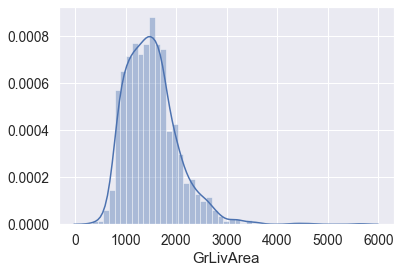

In [44]:
sns.distplot(train_df['GrLivArea'])
print('skwe: ', train_df['GrLivArea'].skew())
print('kurt: ', train_df['GrLivArea'].kurt())

skwe:  12.207687851233496
kurt:  203.24327101886033


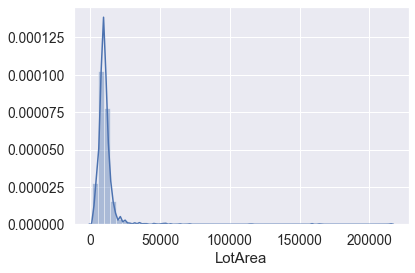

In [45]:
sns.distplot(train_df['LotArea'])
print('skwe: ', train_df['LotArea'].skew())
print('kurt: ', train_df['LotArea'].kurt())

skwe:  -0.006995182187690808
kurt:  0.28260268850118564


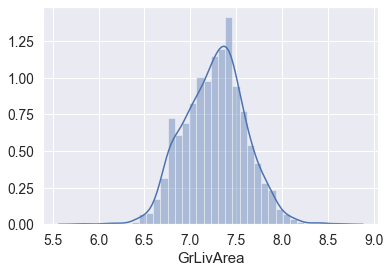

In [46]:
sns.distplot(train_df['GrLivArea'].apply(np.log))
print('skwe: ', train_df['GrLivArea'].apply(np.log).skew())
print('kurt: ', train_df['GrLivArea'].apply(np.log).kurt())

skwe:  -0.1379938086958118
kurt:  4.713358369108622


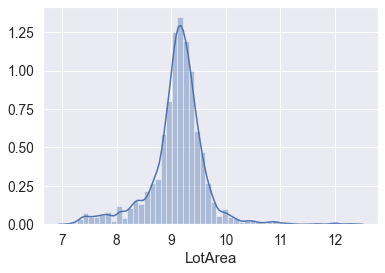

In [47]:
sns.distplot(train_df['LotArea'].apply(np.log))
print('skwe: ', train_df['LotArea'].apply(np.log).skew())
print('kurt: ', train_df['LotArea'].apply(np.log).kurt())

In [48]:
for col in categorical_feats:
    print(train_df[col].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

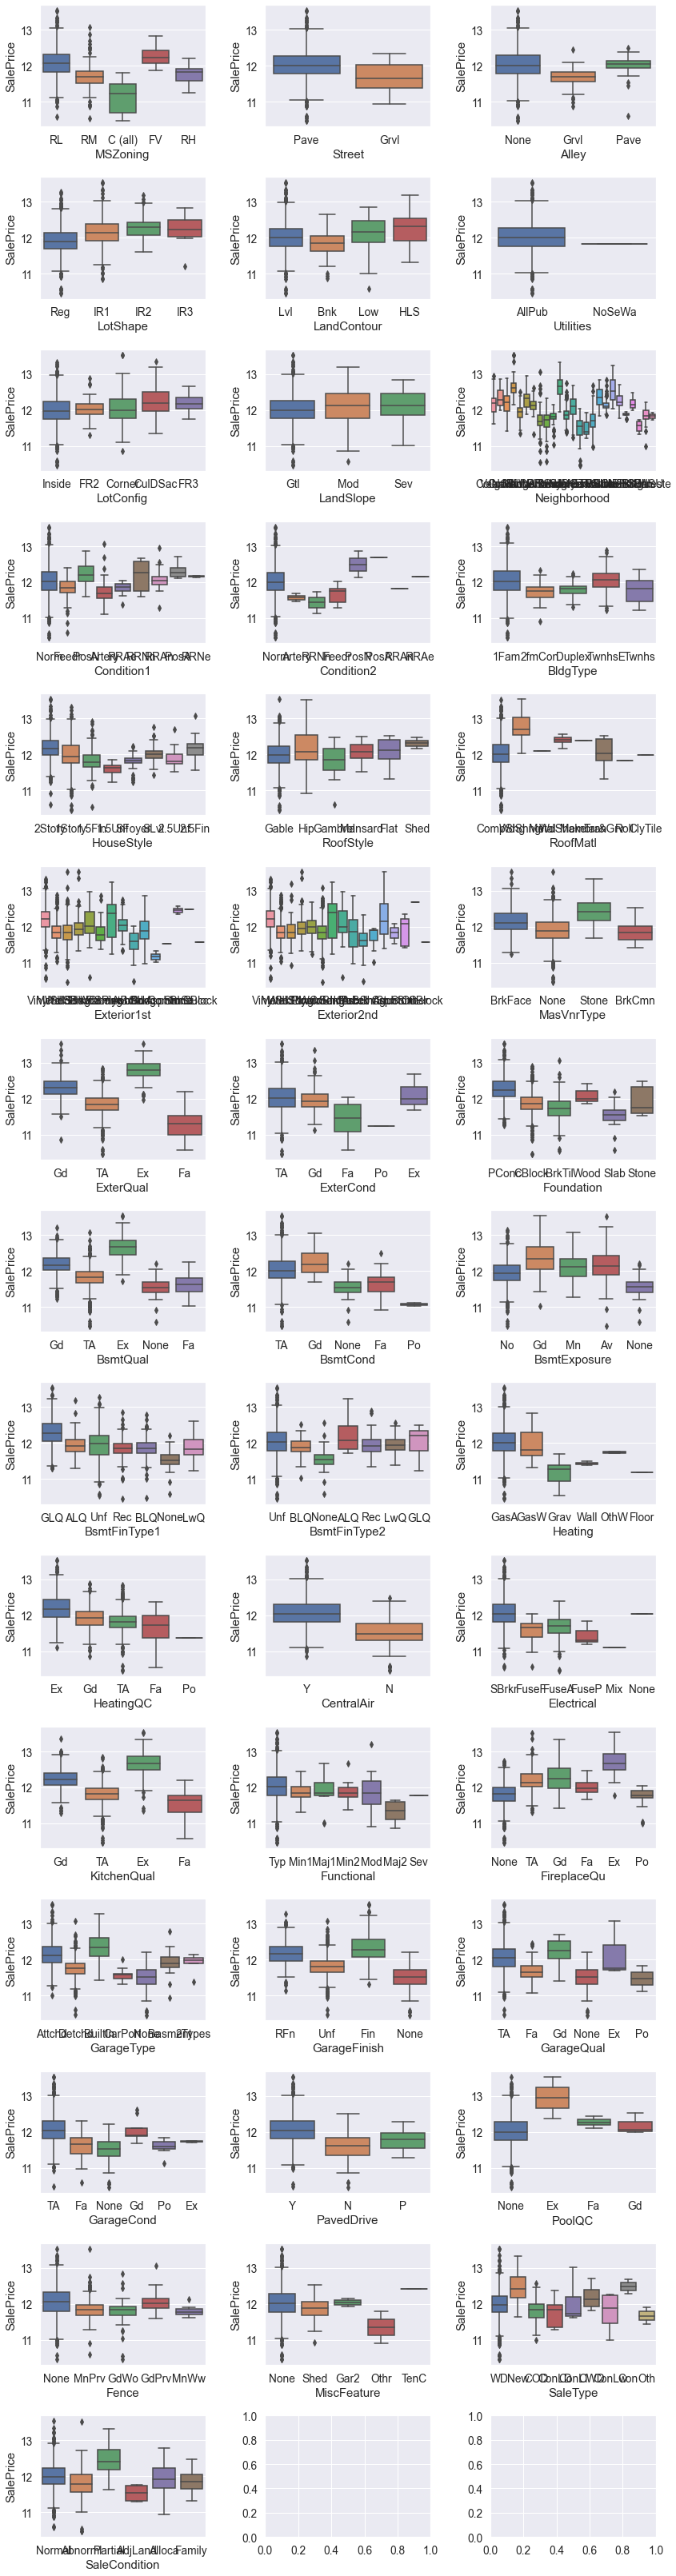

In [49]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=train_df['SalePrice'].apply(np.log), data=train_df, ax=axs[r][c])
            
plt.tight_layout()
plt.show()

# EDAその3

参考ノートブック：https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

読んだ感想：基本的にはEDA1とEDA2と流れは変わらない。データ確認→欠損値処理→numericalデータの分布・歪度・尖度確認→今回扱うデータでは対数変換で正規分布になるようにデータを変換（機械学習モデルが回帰しやすくなるように）→目的変数と相関の高い特徴量をピックアップ。相関が低いものは削除。更に多重共線性に引っかからないように似た特徴や、説明変数同士で相関の高いものはまとめるor削除。<br>
という流れを踏襲したものであった。<br>
今はまだ実際に機械学習モデルを使って回帰を実装するところまでは行わないが、ノートブックには実装があったので、念の為メモ<br>

# EDAその4

参考ノートブック<br>
https://www.kaggle.com/dgawlik/house-prices-eda<br>

In [54]:
train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

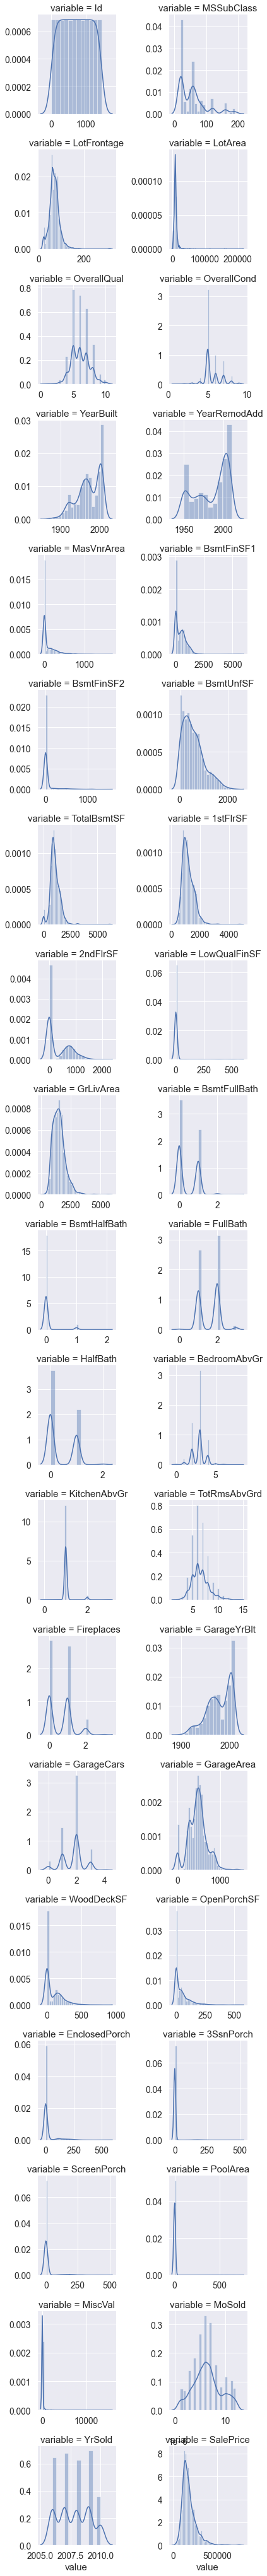

In [58]:
# numericalデータの分布確認
quantitative = train_df.dtypes[train_df.dtypes != 'object'].index
f = pd.melt(train_df, value_vars=quantitative)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

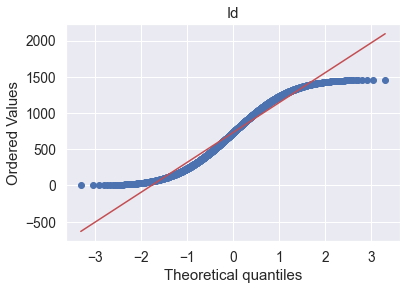

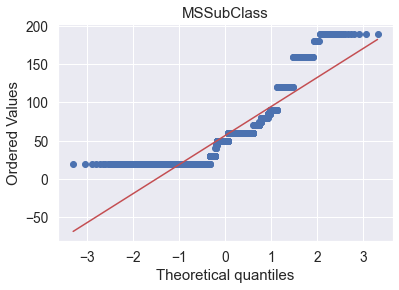

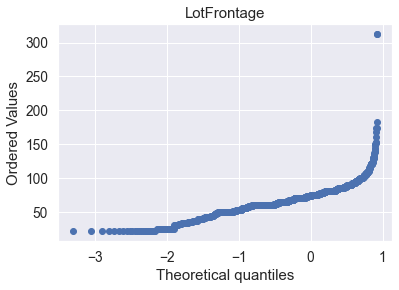

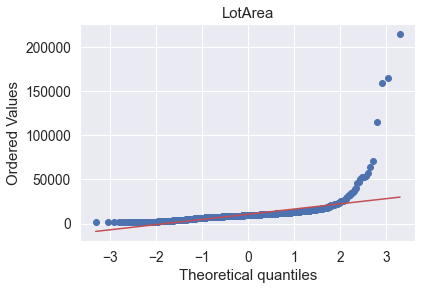

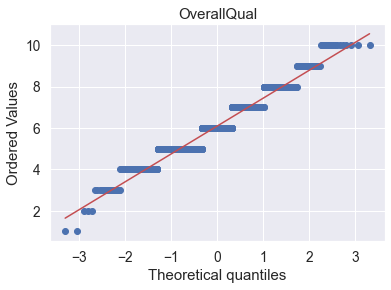

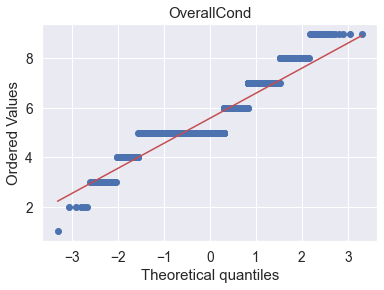

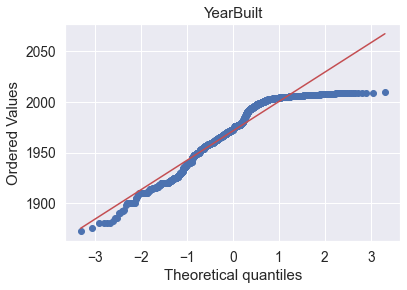

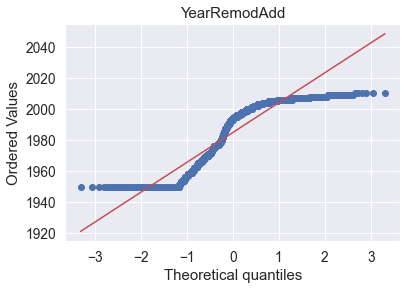

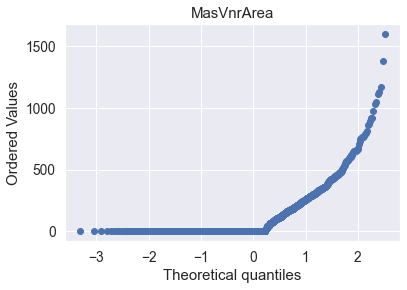

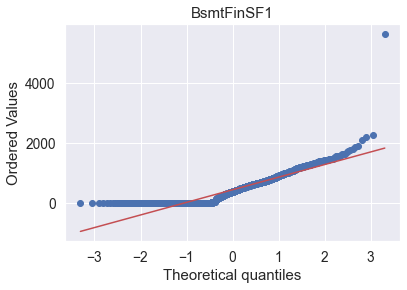

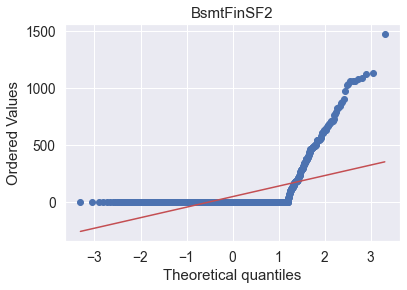

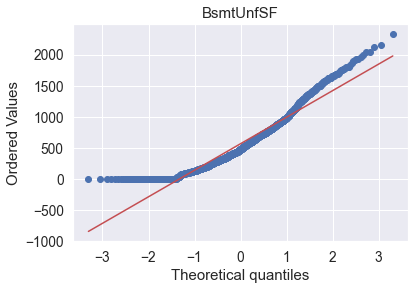

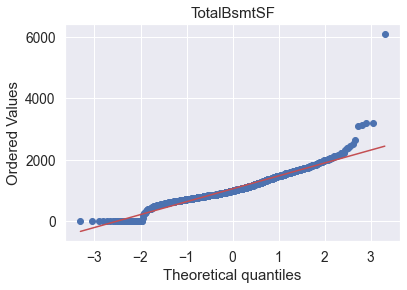

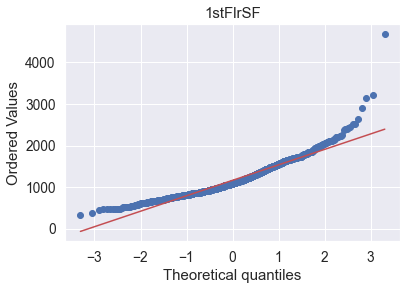

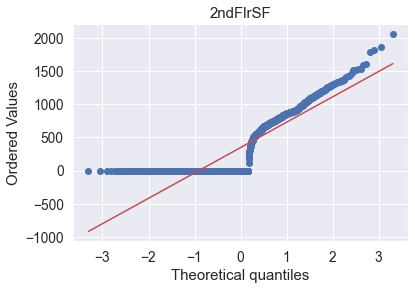

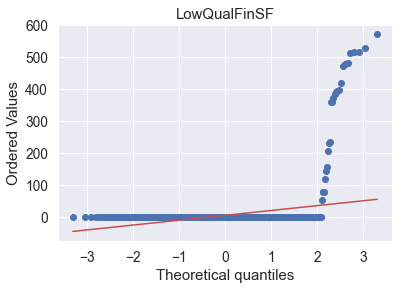

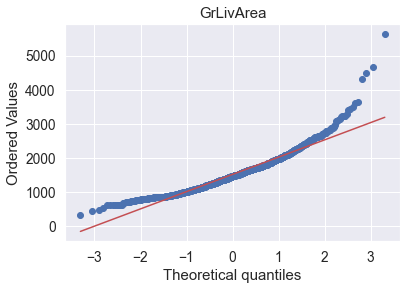

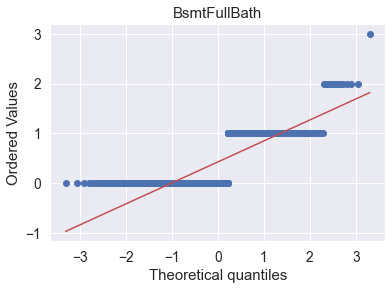

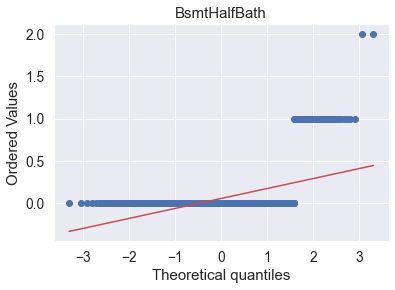

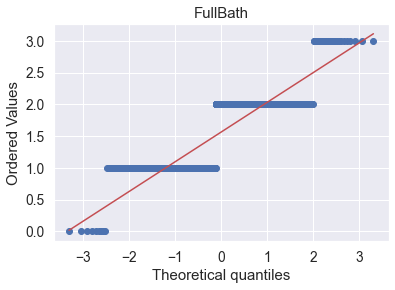

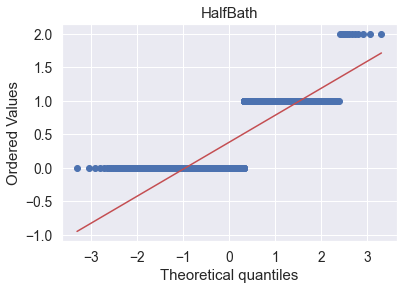

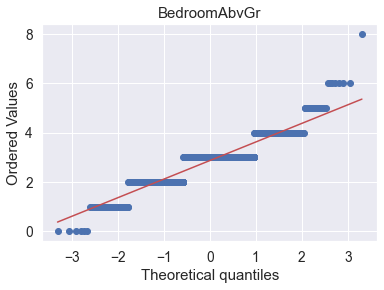

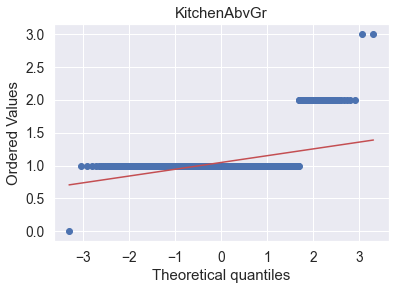

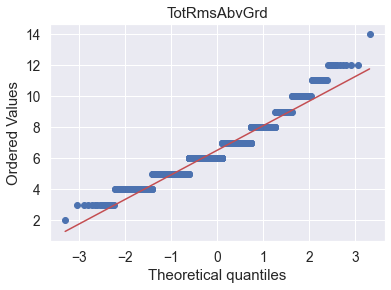

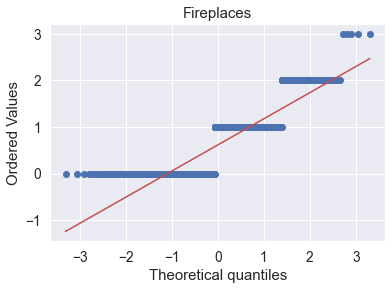

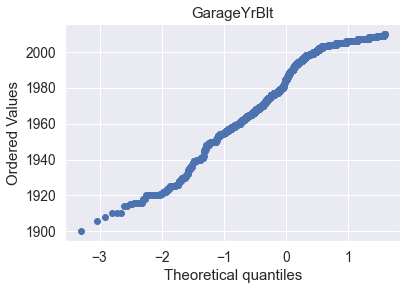

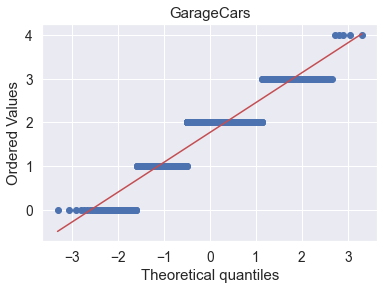

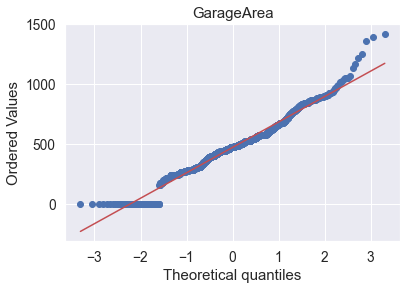

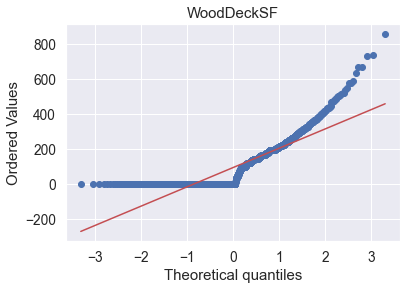

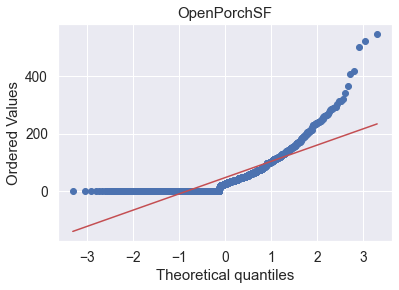

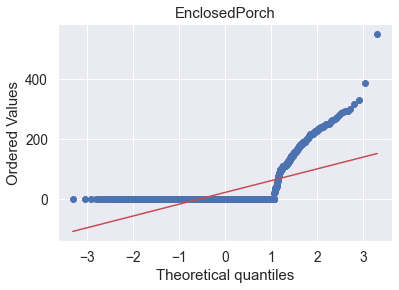

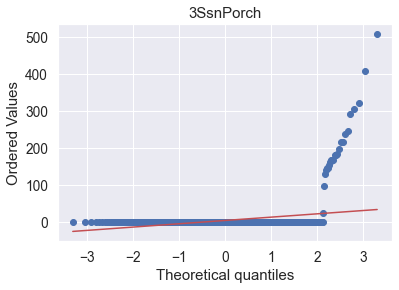

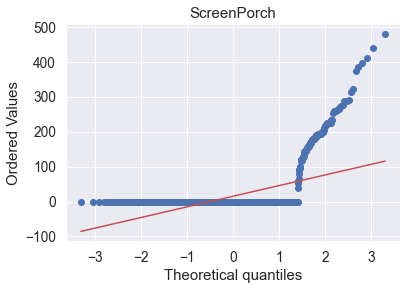

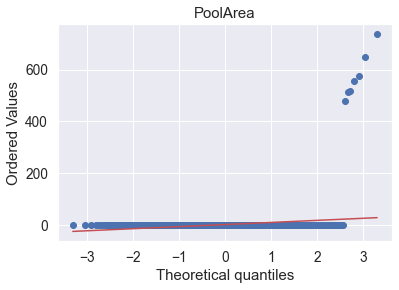

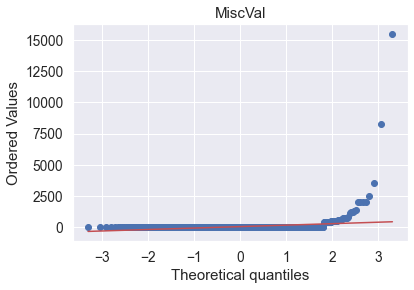

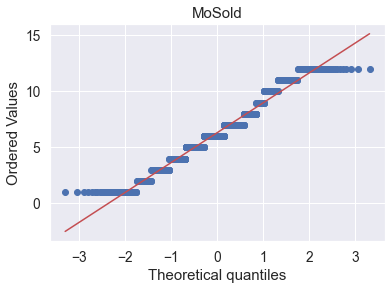

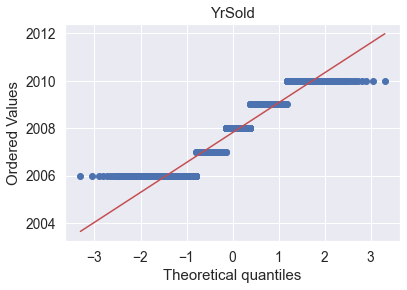

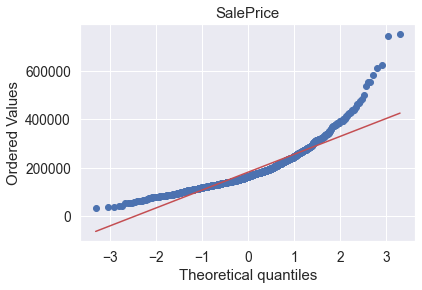

In [72]:
for col in numerical_feats:
#     fig = plt.figure()
    stats.probplot(train_df[col], plot=plt)
    plt.title('{}'.format(col))
    plt.show()

# EDAその5

参考ノートブック：https://www.kaggle.com/hoangnguyen719/eda-feature-selection

特徴量を類似した項目毎に分類し、目的変数との相関を見比べながら、特徴量を1つにまとめたり削除したりするEDAを行っていた。

# EDAその6

参考ノートブック：https://www.kaggle.com/yassineghouzam/eda-introduction-to-ensemble-regression<br>

これまで見てきたノートブック同様、EDAからregressionまでの流れは大まかに同じであった。<br>
他のノートブックと比較して、プロットされていた図が直感的に捉えやすく、参考になるものが多かった。<br>